In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [27]:
class BMIState(TypedDict):

    height_m: float
    weight_kg: float
    bmi: float
    category: str

In [28]:
def calculate_bmi(state: BMIState) -> BMIState:

    height = state['height_m']
    weight = state['weight_kg']
    bmi = weight / (height ** 2)
    
    return {'height_m': height, 'weight_kg': weight, 'bmi': bmi}


def labeled_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state['category'] = "UnderWeight"
    elif 18.5 <= bmi < 24.9:
        state['category'] = "Normal weight"
    elif 25 <= bmi < 29.9:
        state['category'] = "Overweight"
    else:
        state['category'] = 'Obesity'

    return state

In [29]:
graph = StateGraph(BMIState)

graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('labeled_bmi', labeled_bmi)

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'labeled_bmi')
graph.add_edge('labeled_bmi', END)

workflow = graph.compile()



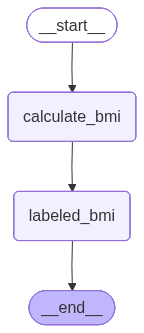

In [30]:
workflow

In [33]:
initial_state = {'height_m': 1.82, 'weight_kg': 74}

output_state = workflow.invoke(initial_state)
output_state

{'height_m': 1.82,
 'weight_kg': 74,
 'bmi': 22.34029706557179,
 'category': 'Normal weight'}